In [523]:
#Used for math opperations
import numpy as np
import numpy.random as nprnd
import math

#Used for plotting data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import curve_fit
import seaborn as sns

#Used to read outside files
import json

In [524]:
#Takes in the json file and assigns it the name 'data'
with open('test1.json') as f:
  data = json.load(f)

# Raw Data Display

In [525]:
#Creates a list of all 'n' values from json file
nvals1 = [] #Saves the n values as strings
nvals = [] #Saves the n values as ints

#Generate string lists
for i in data['info']['n']:
    nvals1.append(i)
    nvals.append(i)

#Generate int list
for i in range(0, len(nvals1)):
    nvals[i] = int(nvals1[i])

In [526]:
#Finds the quartile 'n' values: located 1/4 through, 1/2 through, 3/4 through, and the maximum
quart = nvals[int(np.floor(len(nvals)/4))]
half = nvals[int(np.floor(len(nvals)/2))]
tquar = nvals[int(np.floor(3*len(nvals)/4))]
maxi = nvals[len(nvals)-1]

In [527]:
#Defines a function to get theta values for a given 'n' on the circle. Goes from 0 to 2pi
def getTheta(n):
    theta = []
    for k in range(0,n+1):
        theta.append((2*np.pi*k)/n)
    return theta

In [528]:
#Gets specific Trial Data for each quartile
#If you want to try a different data set for graphing, alter the number in the last box
q1 = data['info']['n'][str(quart)]['trialData'][1]
q1.append(q1[0]) #Adds the value for theta=0 to the end of the list so it makes a full circle

q2 = data['info']['n'][str(half)]['trialData'][1]
q2.append(q2[0])

q3 = data['info']['n'][str(tquar)]['trialData'][1]
q3.append(q3[0])

q4 = data['info']['n'][str(maxi)]['trialData'][1]
q4.append(q4[0])

#Creates theta values for each n value
theta1 = getTheta(quart)
theta2 = getTheta(half)
theta3 = getTheta(tquar)
theta4 = getTheta(maxi)

In [529]:
#Creates lines at 0 for plotting the black circle
line1 = []
line2 = []
line3 = []
line4 = []

for a in range(len(theta1)):
        line1.append(0*a)
        
for a in range(len(theta2)):
        line2.append(0)
        
for a in range(len(theta3)):
        line3.append(0)
        
for a in range(len(theta4)):
        line4.append(0)

### Heat Map

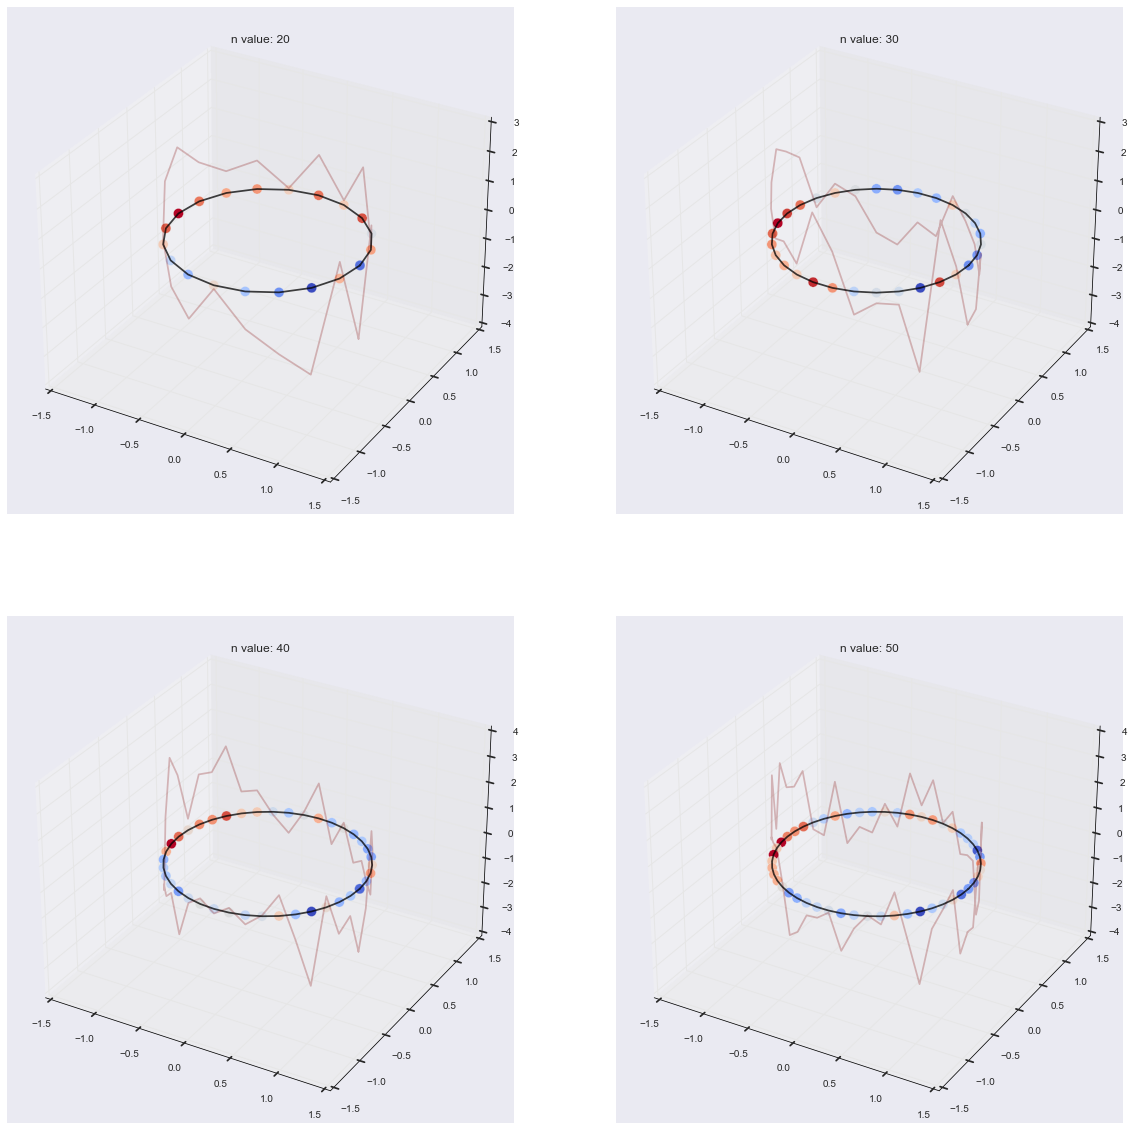

In [530]:
#Makes the graphs either interactive or not
#%matplotlib notebook
%matplotlib inline

#Defines the shape of the subplots and their type
fig = plt.figure(figsize = (20,20))
ax1 = plt.subplot(221, projection='3d')
ax2 = plt.subplot(222, projection='3d')
ax3 = plt.subplot(223, projection='3d')
ax4 = plt.subplot(224, projection='3d')
    
#Data for q1
ax1.plot3D(np.cos(theta1), np.sin(theta1), q1, alpha = 0.25, c = 'maroon') #Plots a hight graph to show data
ax1.plot3D(np.cos(theta1), np.sin(theta1), line1, alpha = .75, c = 'black') #Plots black circle
ax1.scatter3D(np.cos(theta1), np.sin(theta1), line1, cmap = 'coolwarm', c = q1, alpha = 1, s = 100) #Plots heat map on circle
ax1.set_title("n value: %s" % quart) #Creates the title

#Data for q2
ax2.plot3D(np.cos(theta2), np.sin(theta2), q2, alpha = 0.25, c = 'maroon')
ax2.plot3D(np.cos(theta2), np.sin(theta2), line2, alpha = 0.75, c = 'black')
ax2.scatter3D(np.cos(theta2), np.sin(theta2), line2, cmap = 'coolwarm', c = q2, alpha = 1, s = 100)
ax2.set_title("n value: %s" % half)

#Data for q3
ax3.plot3D(np.cos(theta3), np.sin(theta3), q3, alpha = 0.25, c = 'maroon')
ax3.plot3D(np.cos(theta3), np.sin(theta3), line3, alpha = 0.75, c = 'black')
ax3.scatter3D(np.cos(theta3), np.sin(theta3), line3, cmap = 'coolwarm', c = q3, alpha = 1, s = 100)
ax3.set_title("n value: %s" % tquar)

#Data for q4
ax4.plot3D(np.cos(theta4), np.sin(theta4), q4, alpha = 0.25, c = 'maroon')
ax4.plot3D(np.cos(theta4), np.sin(theta4), line4, alpha = 0.75, c = 'black')
ax4.scatter3D(np.cos(theta4), np.sin(theta4), line4, cmap = 'coolwarm', c = q4, alpha = 1, s = 100)
ax4.set_title("n value: %s" % maxi)

plt.show()

# Maxima Analysis

In [531]:
#Gets the mean maxima for each n value in the json file
MaxMean = []
for j in range(len(nvals1)):
    MaxMean.append(data['info']['n'][nvals1[j]]['meanOfMaxima'])

In [532]:
#Gives equation to try and fit data
def func1(x, a, b):
    return a*(np.log(x)**b)

#popt is the values
#pcov is the chi squared matrix
popt, pcov = curve_fit(func1, nvals, MaxMean)

### Maxima Graph

For a*ln(n)^b you have a,b values: 
[0.93914256 0.90572718]


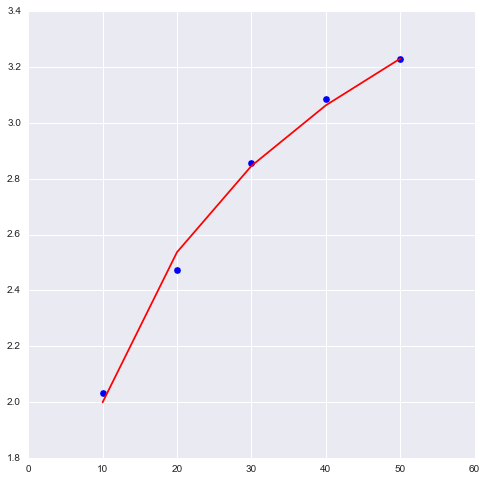

In [533]:
#Defining what the plot size
plt.style.use('seaborn')
f = plt.figure(figsize = (8,8))

#Plot Data and Line of best fit
plt.scatter(x=nvals,y=MaxMean,s=50)
plt.plot(nvals, func1(nvals, *popt), c="red", label=popt)


#Gives numbers for line of best fit equation
print("For a*ln(n)^b you have a,b values: ")
print(popt)